In [8]:
import os
import torch
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import numpy as np
import random
from pathlib import Path
from scipy import interpolate
from sklearn.preprocessing import normalize

# make x and y be a function of t
# t is the total distance traveled


def get_strokes(path, max_stroke_count=None):
    """
    Args:
        path: XML path to stroke file

    Returns:
        list of lists of dicts: each dict contains a stroke, keys: x,y, time
    """
    root = ET.parse(path).getroot()
    all_strokes = root[1]
    stroke_lists = []
    start_end_strokes_lists = []

    # If not constrained by number of strokes, set max_stroke_count to full length window
    if max_stroke_count is None:
        max_stroke_count = len(all_strokes) - 1
    
    for i in range(len(all_strokes) - max_stroke_count):
        strokes = all_strokes[i:i + max_stroke_count]
        stroke_list = []
        min_time = float(strokes[0][0].attrib["time"])
        last_time = 0
        stroke_delay = 0  # time between strokes
        start_end_strokes = [] # list of start times and end times between strokes; one before sequence starts!
        
        for stroke in strokes:
            x_coords = []
            y_coords = []
            time_list = []

            for i, point in enumerate(stroke):
                # print("Points", len(strokes))
                x, y, time = point.attrib["x"], point.attrib["y"], point.attrib["time"]
                x_coords.append(int(x))
                y_coords.append(-int(y))

                if i == 0:  # no time passes between strokes!
                    min_time += float(time) - min_time - last_time - .001
                    start_end_strokes.append((last_time, float(time) - min_time))

                next_time = float(time) - min_time

                if time_list and next_time == time_list[-1]:
                    next_time += .001
                    assert next_time > time_list[-1]

                # No repeated times
                if time_list and next_time <= time_list[-1]:
                    next_time = time_list[-1] + .001

                time_list.append(next_time)
            last_time = time_list[-1]
            stroke_list.append({"x": x_coords, "y": y_coords, "time": time_list})

        stroke_lists.append(stroke_list)
        start_end_strokes_lists.append(start_end_strokes)
        
    return stroke_lists, start_end_strokes_lists

def convert_strokes(stroke_list):
    x, y, time = [], [], []
    [x.extend(key["x"]) for key in stroke_list]
    [y.extend(key["y"]) for key in stroke_list]
    [time.extend(key["time"]) for key in stroke_list]
    return np.array(x), np.array(y), np.array(time)

def process(time):
    total_time = np.max(time) - np.min(time)


In [9]:
def normalize(my_array):
    return ((my_array-np.min(my_array))/(np.max(my_array)-np.min(my_array))-.5)*2

def get_gts(path, instances = 50):
    stroke_list, start_end_strokes = get_strokes(path)
    x,y,time = convert_strokes(stroke_list)

    # find dead timezones
    # make x and y independently a function of t
    time_continuum = np.linspace(np.min(time), np.max(time), instances)
    x_func = interpolate.interp1d(time, x)
    y_func = interpolate.interp1d(time, y)

    for i,t in enumerate(time_continuum):
        for lower, upper in start_end_strokes:
            if t < lower:
                break
            if t > lower and t < upper:
                t = lower if abs(t-lower)<abs(t-upper) else upper
                time_continuum[i] = t
                break
    return normalize(x_func(time_continuum)), normalize(y_func(time_continuum))


In [10]:
path = Path("/media/data/GitHub/simple_hwr/data/prepare_online_data/line-level-xml/lineStrokes/a01/a01-000/a01-000u-01.xml")

get_gts(path)

TypeError: list indices must be integers or slices, not str

In [13]:
def extract_gts(path, instances = 50, max_stroke_count=None):
    """ Take in xml with strokes, output ordered target coordinates
        Parameterizes x & y coordinates as functions of t
        Any t can be selected; strokes are collapsed so there's minimal time between strokes

        Start stroke flag - true for first point in stroke
        End stroke flag - true for last point in stroke
        ** A single point can have both flags!

    Args:
        path (str): path to XML
        instances (int): number of desired coordinates

    Returns:
        x-array, y-array
    """
    stroke_lists, start_end_strokes_lists = get_strokes(path, max_stroke_count=max_stroke_count)
    
    output_gts = []
    output_stroke_lists = []
    output_xs_to_ys = []
    print(stroke_lists)
    print(start_end_strokes_lists)
    for stroke_list, start_end_strokes in zip(stroke_lists, start_end_strokes_lists):
        x,y,time = convert_strokes(stroke_list)

        # find dead timezones
        # make x and y independently a function of t
        time_continuum = np.linspace(np.min(time), np.max(time), instances)
        x_func = interpolate.interp1d(time, x)
        y_func = interpolate.interp1d(time, y)
        
        
def pen_up_motions():
    pass

In [14]:
extract_gts(path)

[[{'x': [1073, 1072, 1066, 1052, 1030, 1009, 994, 980, 971, 968, 966, 972, 978, 991, 1003, 1016, 1021, 1030, 1040, 1049, 1055, 1058, 1064, 1071, 1071, 1074, 1083, 1097, 1114, 1134, 1158, 1181, 1200, 1218, 1220, 1223, 1221, 1220, 1215, 1204], 'y': [-1058, -1085, -1117, -1152, -1196, -1242, -1286, -1317, -1336, -1344, -1339, -1340, -1320, -1298, -1266, -1231, -1184, -1143, -1108, -1077, -1049, -1021, -1006, -1006, -1006, -1013, -1042, -1082, -1124, -1172, -1225, -1280, -1327, -1365, -1373, -1376, -1372, -1369, -1353, -1330], 'time': [0.0009999999999763531, 0.02100000000007185, 0.031000000000062755, 0.051000000000044565, 0.07100000000002638, 0.08100000000001728, 0.09100000000000819, 0.11099999999999, 0.1309999999999718, 0.1410000000000764, 0.1510000000000673, 0.1710000000000491, 0.19100000000003092, 0.20100000000002183, 0.22100000000000364, 0.23099999999999454, 0.25099999999997635, 0.26099999999996726, 0.28100000000006276, 0.29100000000005366, 0.31100000000003547, 0.3210000000000264, 0.33

In [146]:
def get_raw_strokes(path, start_stroke=None, end_stroke=None):
    """
    Args:
        path: XML path to stroke file OR XML parsing of it

    Returns:
        list of lists of dicts: each dict contains a stroke, keys: x,y, time
    """
    if isinstance(path, Path):
            root = ET.parse(path).getroot()
            all_strokes = root[1]
    else:
        all_strokes = path
        
    stroke_list = []
    strokes = all_strokes[start_stroke:end_stroke]
    start_times = []
    
    for stroke in strokes:
        x_coords = []
        y_coords = []
        time_list = []

        for i, point in enumerate(stroke):

            x, y, time = point.attrib["x"], point.attrib["y"], float(point.attrib["time"])
            if not stroke_list and i == 0:
                first_time=time
            
            time -= first_time
            x_coords.append(int(x))
            y_coords.append(-int(y))
            time_list.append(round(time,3))
            if i==0:
                start_times.append(time)
            
        stroke_list.append({"x": x_coords, "y": y_coords, "time": time_list})
        
    return stroke_list, start_times


def create_functions_from_strokes(strokes, time_interval=None):
    x_list = []
    y_list = []
    t_list = []
    stroke_down = []
    stroke_down_times = []
    
    t_offset = 0
    start_times = []
    epsilon = 1e-5
    
    
    
    
    for i, stroke_dict in enumerate(strokes):
        x_list+=stroke_dict["x"]
        y_list+=stroke_dict["y"]
        
        # Set duration for "upstroke" events
        if not time_interval is None and i > 0:
            next_start_time = stroke_dict["time"][0]
            last_end_time = t_list[-1]
            t_offset = time_interval + last_end_time - next_start_time 
            t_list_add = [t+t_offset for t in stroke_dict["time"]]
        else:
            t_list_add = stroke_dict["time"]
        
        t_list += t_list_add
        start_times += [t_list_add[0]]
        
        ## Stroke up/down times
        # Add a stroke up
        if time_interval > 2*epsilon:
            stroke_down += [0] + [1]*len(stroke_dict["x"]) + [0]
            stroke_down_times += [t_list_add[0]-epsilon] + t_list_add + [t_list_add[-1]+epsilon]
        else:
            stroke_down += [1]*len(stroke_dict["x"])
            stroke_down_times += t_list_add
            
    # Add the last time to the start times
    start_times += [t_list_add[-1]]
    
    # Have interpolation not move after last point
    x_list += [x_list[-1]]
    y_list += [y_list[-1]]
    t_list += [t_list[-1]+20]
    stroke_down += [0,0]
    stroke_down_times += [stroke_down_times[-1]+epsilon, stroke_down_times[-1]+20]
    
    stroke_down_func = interpolate.interp1d(stroke_down_times, stroke_down)
    x_func = interpolate.interp1d(t_list, x_list)
    y_func = interpolate.interp1d(t_list, y_list)
    return x_func, y_func, stroke_down_func, start_times

In [149]:
strokes, starts = get_raw_strokes(path)
x, y, stroke_down_func, starts = create_functions_from_strokes(strokes, time_interval=0.5)

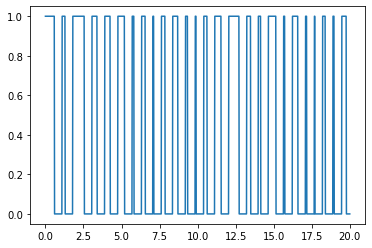

In [151]:
x_space = np.linspace(0,20,1000)
plt.plot(x_space, stroke_down_func(x_space))

In [133]:
print(x_space)

[ 0.          0.02002002  0.04004004  0.06006006  0.08008008  0.1001001
  0.12012012  0.14014014  0.16016016  0.18018018  0.2002002   0.22022022
  0.24024024  0.26026026  0.28028028  0.3003003   0.32032032  0.34034034
  0.36036036  0.38038038  0.4004004   0.42042042  0.44044044  0.46046046
  0.48048048  0.5005005   0.52052052  0.54054054  0.56056056  0.58058058
  0.6006006   0.62062062  0.64064064  0.66066066  0.68068068  0.7007007
  0.72072072  0.74074074  0.76076076  0.78078078  0.8008008   0.82082082
  0.84084084  0.86086086  0.88088088  0.9009009   0.92092092  0.94094094
  0.96096096  0.98098098  1.001001    1.02102102  1.04104104  1.06106106
  1.08108108  1.1011011   1.12112112  1.14114114  1.16116116  1.18118118
  1.2012012   1.22122122  1.24124124  1.26126126  1.28128128  1.3013013
  1.32132132  1.34134134  1.36136136  1.38138138  1.4014014   1.42142142
  1.44144144  1.46146146  1.48148148  1.5015015   1.52152152  1.54154154
  1.56156156  1.58158158  1.6016016   1.62162162  1.64